In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
data = pd.read_csv('data.csv')
data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [30]:
print("Basic Statistical Description:")
print(data.describe())


Basic Statistical Description:
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [31]:
data.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [32]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())

In [33]:
data.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [34]:
result = data[['Duration','Maxpulse']].agg(['min','max','count','mean'])
result

,Duration,Maxpulse
min,15.000000,100.000000
max,300.000000,184.000000
count,169.000000,169.000000
mean,63.846154,134.047337


In [8]:
d1 = data[data['Calories'].between(500,1000)]
d1

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [35]:
d2 = data[(data['Calories']>500) & (data['Pulse']<100)]
d2

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [36]:
data_modified=data.drop('Maxpulse',axis=1)
data_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [51]:
data.drop('Maxpulse',axis=1 ,inplace=True)
data

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [38]:
data["Calories"]=data["Calories"].astype(float).astype(int)
data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,145,479
2,60,103,135,340
3,45,109,175,282
4,45,117,148,406
...,...,...,...,...
164,60,105,140,290
165,60,110,145,300
166,60,115,145,310
167,75,120,150,320


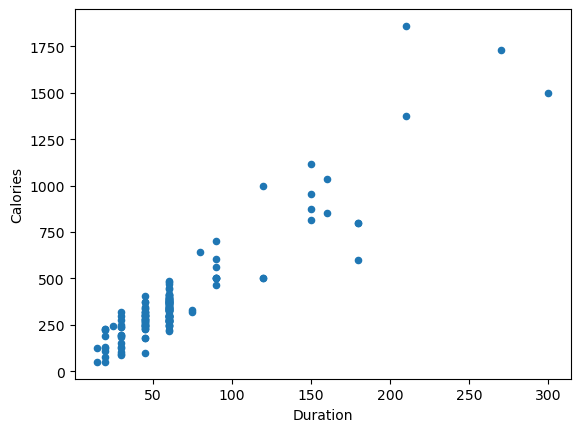

In [39]:
plot = data.plot.scatter(x="Duration",y="Calories")

Dataset:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Mean Squared Error (Train): 29793161.082422983
Mean Squared Error (Test): 35301898.887134895


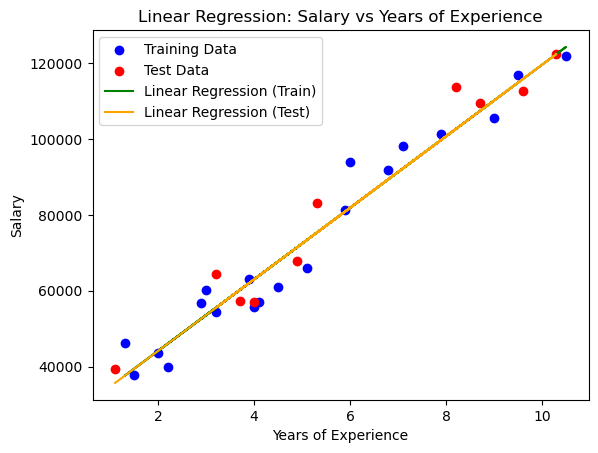

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

file_path = r'C:\Users\User\OneDrive\Desktop\Neural networks\Assignments\ICP4\Salary_Data.csv'  
data = pd.read_csv(file_path)

print("Dataset:")
print(data.head())

X = data[['YearsExperience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("\nMean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_train_pred, color='green', label='Linear Regression (Train)')
plt.plot(X_test, y_test_pred, color='orange', label='Linear Regression (Test)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.legend()
plt.show()